In [1]:
import streamlit as st
import joblib
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

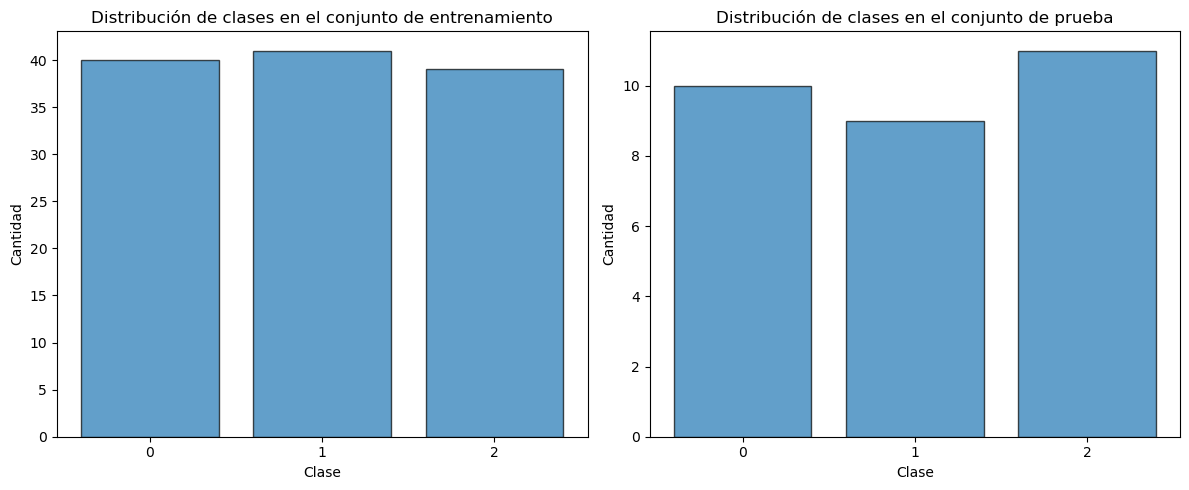

In [2]:
import matplotlib.pyplot as plt

# Visualizar nuevamente la distribución de las clases
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(y_train, bins=np.arange(4)-0.5, edgecolor='black', alpha=0.7, rwidth=0.8, align='mid')
ax[0].set_title("Distribución de clases en el conjunto de entrenamiento")
ax[0].set_xticks([0, 1, 2])
ax[0].set_xlabel("Clase")
ax[0].set_ylabel("Cantidad")

ax[1].hist(y_test, bins=np.arange(4)-0.5, edgecolor='black', alpha=0.7, rwidth=0.8, align='mid')
ax[1].set_title("Distribución de clases en el conjunto de prueba")
ax[1].set_xticks([0, 1, 2])
ax[1].set_xlabel("Clase")
ax[1].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Crear pipeline para transformación de datos
pipeline_svm_lr = Pipeline([
    ('scaler', StandardScaler())
])

# Ajustar el pipeline al conjunto de entrenamiento (esto solo afecta a los modelos SVM y LR)
X_train_transformed = pipeline_svm_lr.fit_transform(X_train)

# Verificar las primeras 5 muestras transformadas
X_train_transformed[:5]


array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

In [4]:
import joblib

# Guardar el pipeline en un archivo .sav en el directorio actual
pipeline_filename = "pipeline_svm_lr.sav"
joblib.dump(pipeline_svm_lr, pipeline_filename)

pipeline_filename


'pipeline_svm_lr.sav'

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en grid para SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 80],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Inicializar GridSearchCV para SVM
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2, cv=5)
grid_search_svm.fit(X_train_transformed, y_train)

# Obtener los mejores parámetros para SVM
best_params_svm = grid_search_svm.best_params_
best_params_svm


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

{'C': 80, 'gamma': 0.01, 'kernel': 'rbf'}

In [6]:
from sklearn.linear_model import LogisticRegression

# Definir los parámetros para la búsqueda en grid para Regresión Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 500],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Inicializar GridSearchCV para Regresión Logística
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, refit=True, verbose=2, cv=5)
grid_search_lr.fit(X_train_transformed, y_train)

# Obtener los mejores parámetros para Regresión Logística
best_params_lr = grid_search_lr.best_params_
best_params_lr


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..............C=0.001, penalty=l1, sol

/home/torrescayo/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/torrescayo/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/torrescayo/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/torrescayo/anaconda3/envs/ML/lib/python3

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Definir los parámetros para la búsqueda en grid para Árboles de Decisión
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar GridSearchCV para Árboles de Decisión
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit=True, verbose=2, cv=5)
grid_search_dt.fit(X_train, y_train)  # No aplicamos transformación para árboles de decisión

# Obtener los mejores parámetros para Árboles de Decisión
best_params_dt = grid_search_dt.best_params_
best_params_dt


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV

[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'random'}

In [8]:
# Entrenar SVM con los mejores parámetros
svm_model = SVC(**best_params_svm)
svm_model.fit(X_train_transformed, y_train)

# Entrenar Regresión Logística con los mejores parámetros
lr_model = LogisticRegression(max_iter=10000, **best_params_lr)
lr_model.fit(X_train_transformed, y_train)

# Entrenar Árbol de Decisión con los mejores parámetros
dt_model = DecisionTreeClassifier(**best_params_dt)
dt_model.fit(X_train, y_train)  # No aplicamos transformación para árboles de decisión

# Guardar los modelos entrenados en archivos .sav
svm_filename = "svm_model.sav" 
lr_filename = "lr_model.sav"
dt_filename = "dt_model.sav"

joblib.dump(svm_model, svm_filename)
joblib.dump(lr_model, lr_filename)
joblib.dump(dt_model, dt_filename)

svm_filename, lr_filename, dt_filename


('svm_model.sav', 'lr_model.sav', 'dt_model.sav')

In [9]:
# Transformar el conjunto de prueba para SVM y Regresión Logística
X_test_transformed = pipeline_svm_lr.transform(X_test)

# Predicciones con los modelos
y_pred_svm = svm_model.predict(X_test_transformed)
y_pred_lr = lr_model.predict(X_test_transformed)
y_pred_dt = dt_model.predict(X_test)

y_pred_svm, y_pred_lr, y_pred_dt


(array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]))

In [10]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# Métricas para SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
confusion_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, recall_svm, precision_svm, f1_svm, confusion_svm, report_svm


(0.9666666666666667,
 0.9629629629629629,
 0.9722222222222222,
 0.9658994032395567,
 array([[10,  0,  0],
        [ 0,  8,  1],
        [ 0,  0, 11]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      0.89      0.94         9\n           2       0.92      1.00      0.96        11\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.96      0.97        30\nweighted avg       0.97      0.97      0.97        30\n')

In [11]:
# Métricas para Regresión Logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
confusion_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

accuracy_lr, recall_lr, precision_lr, f1_lr, confusion_lr, report_lr


(1.0,
 1.0,
 1.0,
 1.0,
 array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n')

In [12]:
# Métricas para Árbol de Decisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt, recall_dt, precision_dt, f1_dt, confusion_dt, report_dt


(1.0,
 1.0,
 1.0,
 1.0,
 array([[10,  0,  0],
        [ 0,  9,  0],
        [ 0,  0, 11]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n')

In [13]:
from sklearn.model_selection import cross_val_score

# Estimar el rendimiento usando validación cruzada para SVM
svm_scores = cross_val_score(SVC(**best_params_svm), X_train_transformed, y_train, cv=5, scoring='accuracy')

# Estimar el rendimiento usando validación cruzada para Regresión Logística
lr_scores = cross_val_score(LogisticRegression(max_iter=10000, **best_params_lr), X_train_transformed, y_train, cv=5, scoring='accuracy')

# Estimar el rendimiento usando validación cruzada para Árboles de Decisión
dt_scores = cross_val_score(DecisionTreeClassifier(**best_params_dt), X_train, y_train, cv=5, scoring='accuracy')

svm_scores.mean(), lr_scores.mean(), dt_scores.mean()



(0.9666666666666668, 0.9583333333333334, 0.9583333333333334)